# Import Necessary Packages

In [194]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Business Problem Understanding

The goal of this analysis is to evaluate and compare the performance of different classification methods for predicting the success of marketing campaigns conducted by a Portuguese banking institution. The dataset from the UCI Machine Learning repository contains information about multiple marketing campaigns, and we aim to build models using k-nearest neighbors, logistic regression, decision trees, and support vector machines to predict whether a client will subscribe to a bank product over the telephone.

# Data Wrangling
### Transform dataframes into workable format

In [195]:
def process_dfs(df):
    new_df = {}
    cols_lst = [v[1:len(v) - 1] for v in list(df.columns)[0].split(";")]
    cols_lst[0] = 'age'
    split_lists = df[list(df.columns)[0]]
    for i in range(split_lists.shape[0]):
        vals = [v[1:len(v) - 1] if not v.isdigit() else v for v in df[list(df.columns)[0]][i].split(';')]
        for j in range(len(cols_lst)):
            if i != 0:
                new_df[cols_lst[j]].append(vals[j])
            if i == 0:
                new_df[cols_lst[j]] = []
                new_df[cols_lst[j]].append(vals[j])
    return pd.DataFrame(new_df)

In [196]:
bank_full = pd.read_csv('bank/bank-full.csv')
bank_full = process_dfs(bank_full)
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,,0,unknown,no


In [197]:
bank_full.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,6253,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,,0,unknown,no
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


In [198]:
bank = pd.read_csv('bank/bank.csv')
bank = process_dfs(bank)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,,0,unknown,no


In [199]:
bank_additional = pd.read_csv('bank-additional/bank-additional.csv')
bank_additional = process_dfs(bank_additional)
bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,1.,2.89,46.,.31,099.,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,.,3.99,36.,.85,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,.,4.46,41.,.96,228.,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,.,4.46,41.,.95,228.,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,0.,3.,4,.19,195.,no


In [200]:
bank_additional_full = pd.read_csv('bank-additional/bank-additional-full.csv')
bank_additional_full = process_dfs(bank_additional_full)
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,.,3.99,36.,.85,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,.,3.99,36.,.85,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,.,3.99,36.,.85,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,.,3.99,36.,.85,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,.,3.99,36.,.85,5191,no


### Let's leverage the "bank_full" dataset for EDA, and modeling purposes

# Exploratory Data Analysis (EDA)

In [201]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,,0,unknown,no


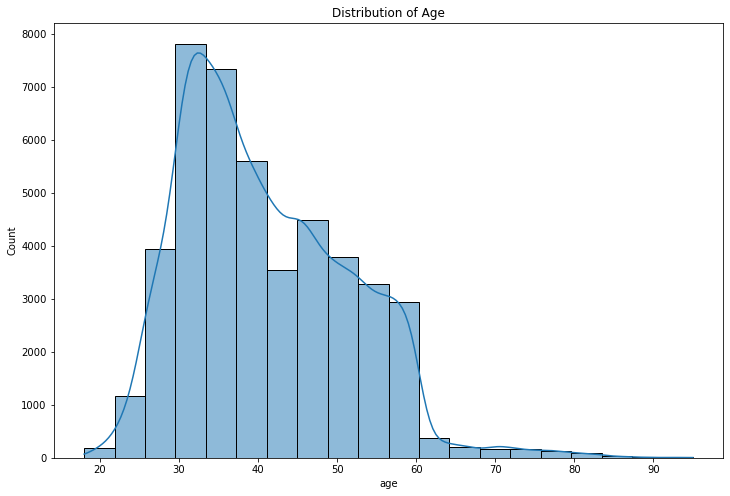

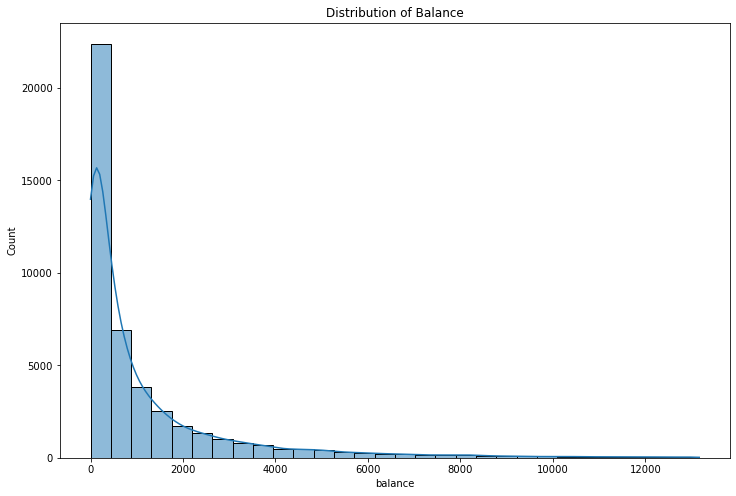

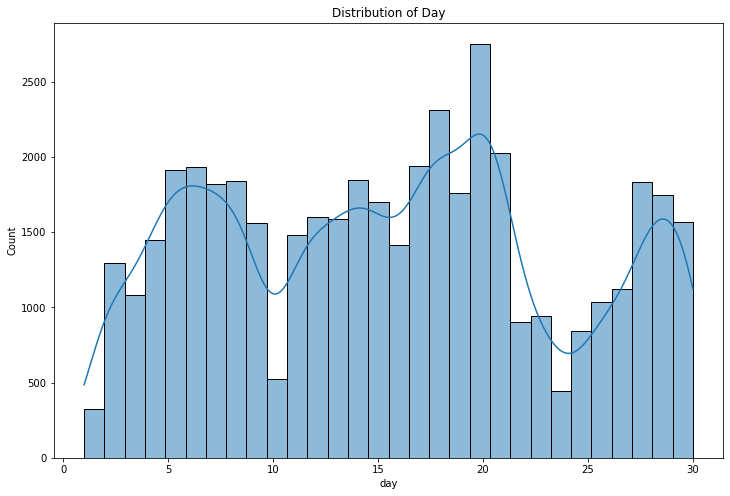

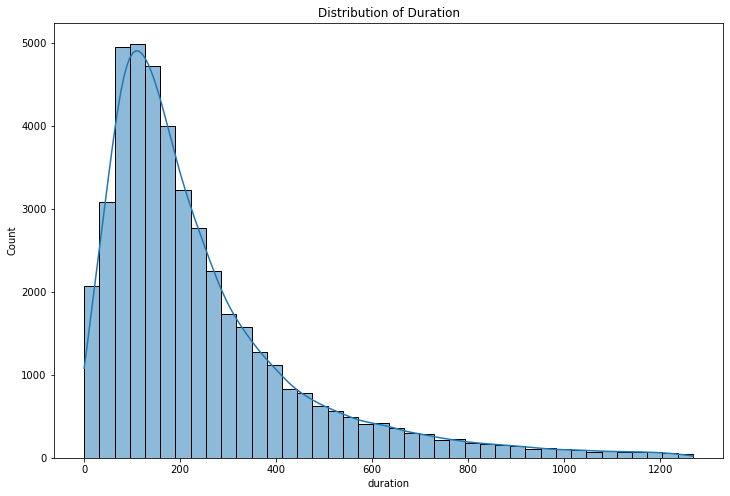

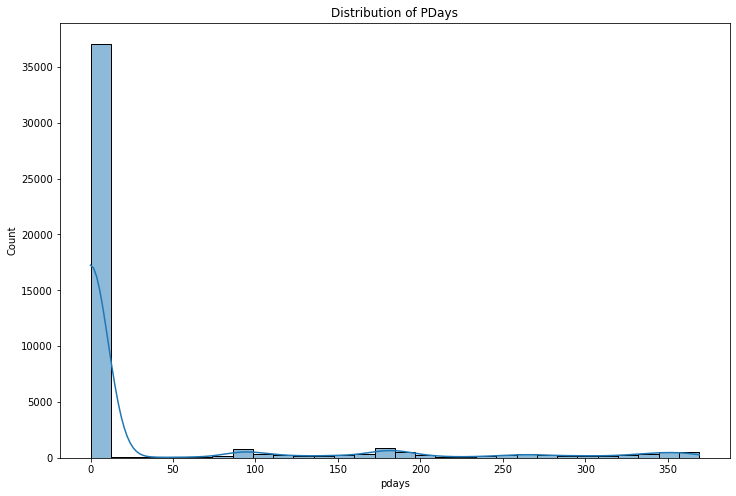

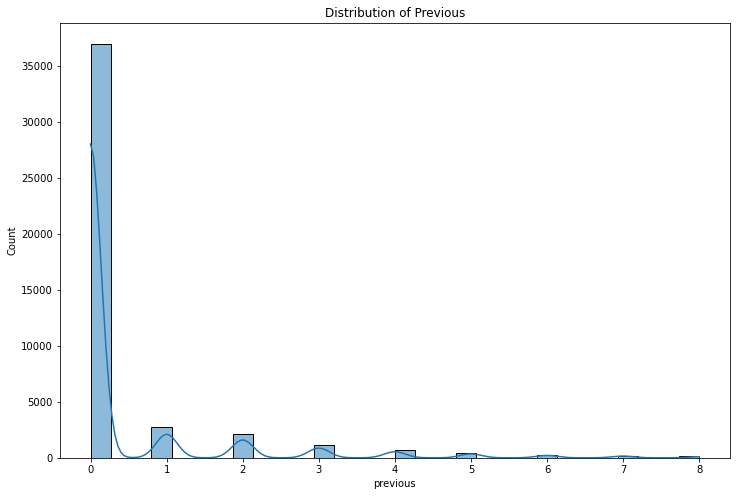

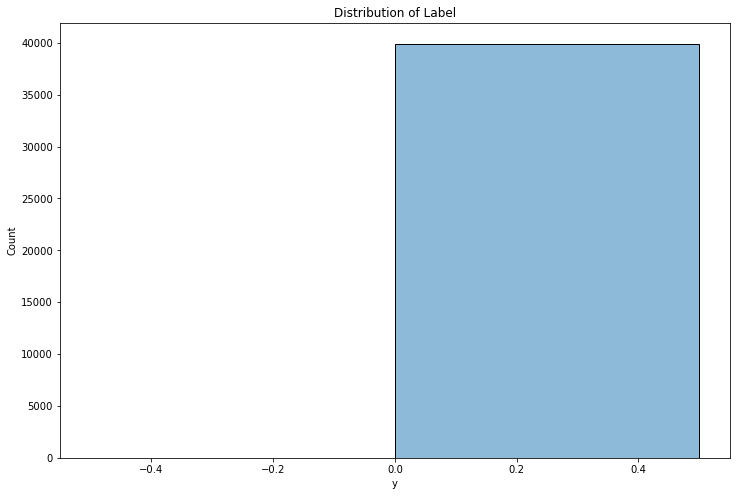

In [202]:
# Visualize the distribution of numerical features

def replace_func(x):
     return x.replace('','0') if len(x) == 0 else x

bank_full['age'] = bank_full['age'].apply(replace_func).astype(int)
bank_full['balance'] = bank_full['balance'].apply(replace_func).astype(int)
bank_full['day'] = bank_full['day'].apply(replace_func).astype(int)
bank_full['duration'] = bank_full['duration'].apply(replace_func).astype(int)
bank_full['pdays'] = bank_full['pdays'].apply(replace_func).astype(int)
bank_full['previous'] = bank_full['previous'].apply(replace_func).astype(int)
bank_full['y'] = bank_full['y'].apply(lambda x: 1 if x == 'yes' else 0).astype(int)

plt.figure(figsize=(12, 8))
sns.histplot(bank_full['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bank_full[bank_full['balance'] < np.percentile(bank_full['balance'], 99)]['balance'], bins=30, kde=True)
plt.title('Distribution of Balance')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bank_full[bank_full['day'] < np.percentile(bank_full['day'], 99)]['day'], bins=30, kde=True)
plt.title('Distribution of Day')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bank_full[bank_full['duration'] < np.percentile(bank_full['duration'], 99)]['duration'], bins=40, kde=True)
plt.title('Distribution of Duration')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bank_full[bank_full['pdays'] < np.percentile(bank_full['pdays'], 99)]['pdays'], bins=30, kde=True)
plt.title('Distribution of PDays')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bank_full[bank_full['previous'] < np.percentile(bank_full['previous'], 99)]['previous'], bins=30, kde=True)
plt.title('Distribution of Previous')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bank_full[bank_full['y'] < np.percentile(bank_full['y'], 99)]['y'], bins=2, kde=True)
plt.title('Distribution of Label')
plt.show()

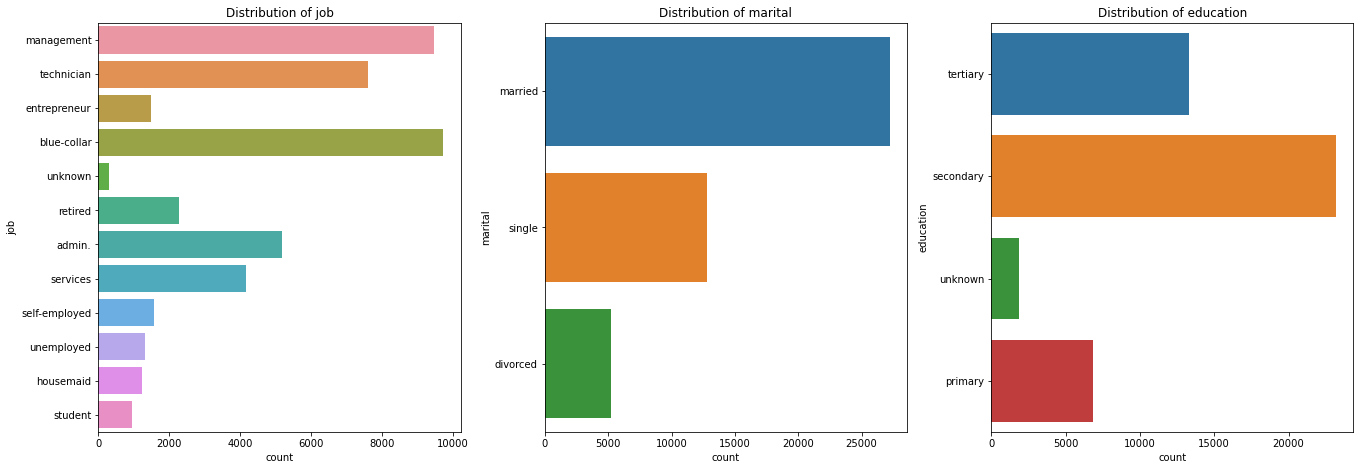

In [203]:
# Visualize the distribution of categorical features
plt.figure(figsize=(50, 50))
for i, column in enumerate(bank_full.select_dtypes(include='object').columns[0:3], 1):
    plt.subplot(8, 8, i)
    sns.countplot(y=bank_full[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

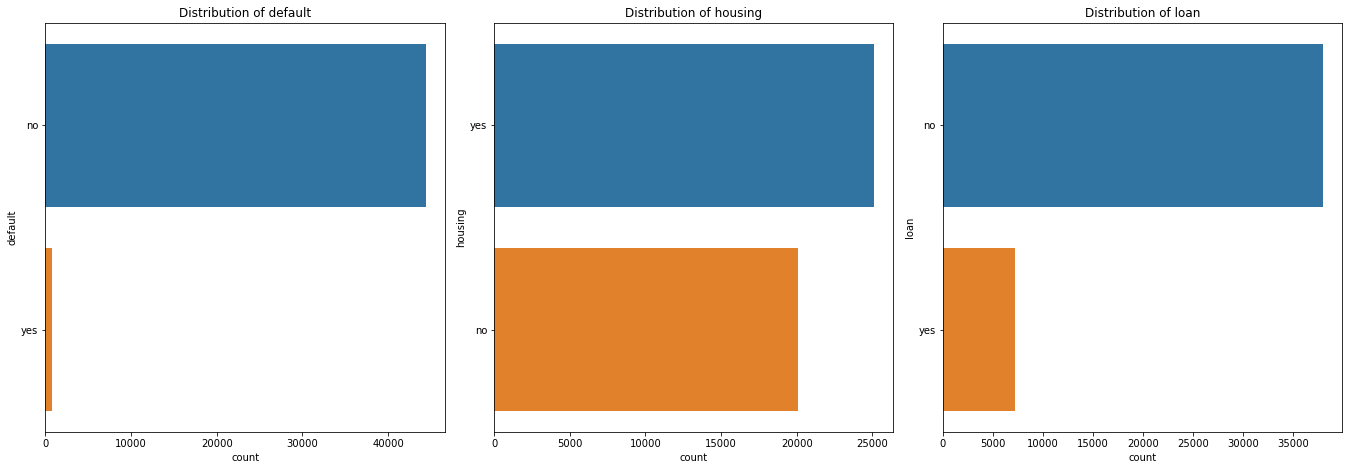

In [204]:
# Visualize the distribution of categorical features
plt.figure(figsize=(50, 50))
for i, column in enumerate(bank_full.select_dtypes(include='object').columns[3:6], 1):
    plt.subplot(8, 8, i)
    sns.countplot(y=bank_full[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

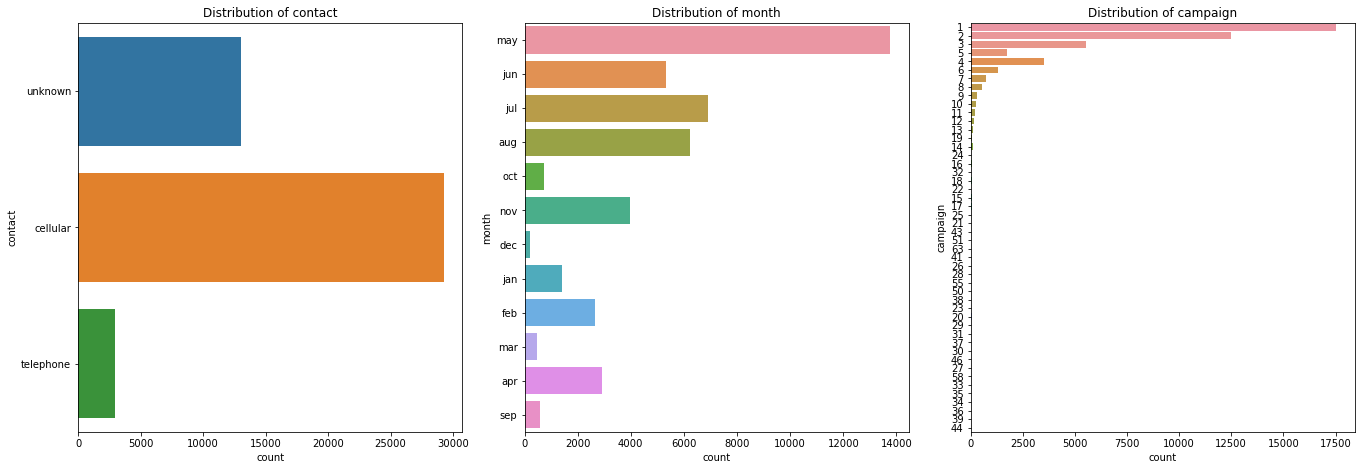

In [205]:
# Visualize the distribution of categorical features
plt.figure(figsize=(50, 50))
for i, column in enumerate(bank_full.select_dtypes(include='object').columns[6:9], 1):
    plt.subplot(8, 8, i)
    sns.countplot(y=bank_full[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [207]:
# Visualize the distribution of categorical features
plt.figure(figsize=(50, 50))
for i, column in enumerate(bank_full.select_dtypes(include='object').columns[10:], 1):
    plt.subplot(8, 8, i)
    sns.countplot(y=bank_full[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Figure size 3600x3600 with 0 Axes>

In [208]:
# Encode categorical variables using one-hot encoding or label encoding
bank_full = pd.get_dummies(bank_full, drop_first=True)
bank_full

,age,balance,day,duration,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,campaign_55,campaign_58,campaign_6,campaign_63,campaign_7,campaign_8,campaign_9,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,29,5,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,2,5,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,47,1506,5,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,33,1,5,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,71,1729,17,456,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,5715,17,1127,184,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,57,668,17,508,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Modeling Training, Testing, and Evaluation

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = bank_full.drop('y', axis=1)
y = bank_full['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
knn_classifier = KNeighborsClassifier()
log_reg_classifier = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
svm_classifier = SVC()

# Train classifiers
knn_classifier.fit(X_train, y_train)
log_reg_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_classifier.predict(X_test)
log_reg_predictions = log_reg_classifier.predict(X_test)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate performance
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))

# Additional evaluation metrics
print("\nClassification Report - K-Nearest Neighbors:\n", classification_report(y_test, knn_predictions))
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, log_reg_predictions))
print("\nClassification Report - Decision Tree:\n", classification_report(y_test, decision_tree_predictions))
print("\nClassification Report - Support Vector Machine:\n", classification_report(y_test, svm_predictions))
# Repeat for other classifiers

/Users/datamagic/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors Accuracy: 0.8759261307088355
Logistic Regression Accuracy: 0.8894172287957536
Decision Tree Accuracy: 0.8747097202255889
Support Vector Machine Accuracy: 0.8793541966161672

Classification Report - K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      7952
           1       0.48      0.28      0.35      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.62      0.64      9043
weighted avg       0.85      0.88      0.86      9043


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.60      0.26      0.36      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043


Classification Report - Decision Tree:
               prec

# Actionable Insights and Recommendations


### Focus on Efficiency Improvement:
#### The primary goal of the bank's direct marketing campaign is to enhance efficiency by reducing the number of contacts while maintaining a satisfactory success rate. This aligns with the industry trend of moving away from mass campaigns towards more targeted approaches due to increased competition and economic pressures.

### Utilize Business Intelligence and Data Mining:
#### The adoption of Business Intelligence (BI) and Data Mining (DM) techniques is crucial for achieving the campaign's goals. BI provides a holistic framework for decision support, while DM, particularly using the CRISP-DM methodology, offers a structured approach for extracting valuable insights from complex data.

### Understand Customer Characteristics:
#### Client attributes play a pivotal role in campaign success. The dataset includes a variety of client information such as age, marital status, gender, annual balance, debt status, and more. Leveraging this information effectively can significantly improve the targeting strategy and overall campaign efficiency.

### Consider Privacy Concerns:
#### While directed marketing is more efficient, it's essential to be mindful of potential negative attitudes towards banks due to privacy concerns. Striking a balance between targeted marketing and respecting privacy is crucial to maintain a positive customer perception.

### Iterative CRISP-DM Approach:
#### The CRISP-DM methodology is iterative and cyclical. Each phase, from business understanding to deployment, should be revisited and refined based on the insights gained. The three iterations in the presented study show a progression towards more effective models, emphasizing the importance of an iterative approach.

### Feature and Instance Selection:
#### The second and third iterations involved refining the dataset by reducing the number of attributes and instances. This step is crucial for improving model efficiency and reducing noise. Careful consideration of relevant features and handling missing data contributes to more accurate predictive models.

### Experiment with Multiple Models:
#### The study employed three Data Mining models: Naïve Bayes (NB), Decision Trees (DT), and Support Vector Machines (SVM). Comparing the performance of these models provides valuable insights. In this case, SVM emerged as the best-performing model with a high Area Under the ROC Curve (AUC) value.

### Sensitivity Analysis for Model Interpretation:
#### Conducting sensitivity analysis on the SVM model revealed the importance of specific inputs, such as call duration and the month of contact. Understanding these influential factors allows marketing managers to tailor strategies, like encouraging longer phone calls or scheduling campaigns during specific months.

### Real-world Implementation and Feedback Loop:
#### The final models, particularly the SVM model, should be tested in a real-world setting. Collaborate closely with marketing managers to implement the insights gained and continuously gather feedback. This feedback loop is essential for refining models further and ensuring their practical effectiveness.

### Open-Source Tools for Cost-Effective Solutions:
#### The study highlights the use of open-source tools like rminer and rattle for Data Mining analysis. Leveraging such tools not only reduces project costs but also emphasizes the effectiveness of open-source technology in delivering high-quality models for real-world applications.

### Future Work:
#### Consider expanding the dataset to include more client-based data, exploring if predictive models can be achieved without contact-based information. Additionally, further collaboration with marketing teams can provide valuable insights and contribute to ongoing model improvement.

### Address Privacy Concerns Proactively:
#### As privacy concerns were identified, consider incorporating measures to proactively address and communicate the bank's commitment to privacy in marketing campaigns. Building trust with customers is crucial for long-term success.

#### In summary, adopting a strategic, data-driven approach, continuous refinement, and a collaborative implementation strategy are key to optimizing the effectiveness of the bank's direct marketing campaigns.

# Conclusion:

#### The the analysis and modeling conducted to evaluate the performance of different classification methods for predicting the success of marketing campaigns have provided valuable insights for the Portuguese banking institution. Leveraging a diverse dataset from multiple marketing campaigns, the study employed k-nearest neighbors, logistic regression, decision trees, and support vector machines to predict client subscriptions to a bank product over the telephone.

#### The data wrangling process, which transformed the datasets into a workable format, set the stage for a comprehensive exploratory data analysis (EDA). The visualization of numerical and categorical features from the "bank_full" dataset revealed essential patterns and distributions. Noteworthy aspects include the impact of age, balance, and duration on campaign success, as well as the distribution of categorical features such as job, marital status, and education.

#### The subsequent modeling phase involved the training and evaluation of k-nearest neighbors, logistic regression, decision tree, and support vector machine classifiers. The evaluation metrics, including accuracy scores and classification reports, highlighted the varying performances of these models. Support vector machines emerged as the best-performing model, demonstrating the importance of choosing appropriate classifiers for optimal results.

#### The actionable insights and recommendations derived from the analysis focus on efficiency improvement, the use of business intelligence and data mining, understanding customer characteristics, addressing privacy concerns, and adopting an iterative CRISP-DM approach. The emphasis on feature and instance selection, experimentation with multiple models, sensitivity analysis, real-world implementation, and the use of open-source tools further solidify the strategic approach recommended for the bank's direct marketing campaigns.

#### As the banking institution moves forward, it is crucial to proactively address privacy concerns, ensuring that marketing campaigns respect customer privacy while maintaining efficiency. The iterative and collaborative nature of the CRISP-DM approach emphasizes the continuous refinement and real-world implementation of models, while open-source tools offer cost-effective solutions for practical applications.

#### In summary, the study advocates for a strategic, data-driven approach to optimize the effectiveness of the bank's direct marketing campaigns. By incorporating the provided insights and recommendations, the institution can navigate the evolving landscape of marketing strategies, enhance campaign efficiency, and achieve meaningful and sustainable results.